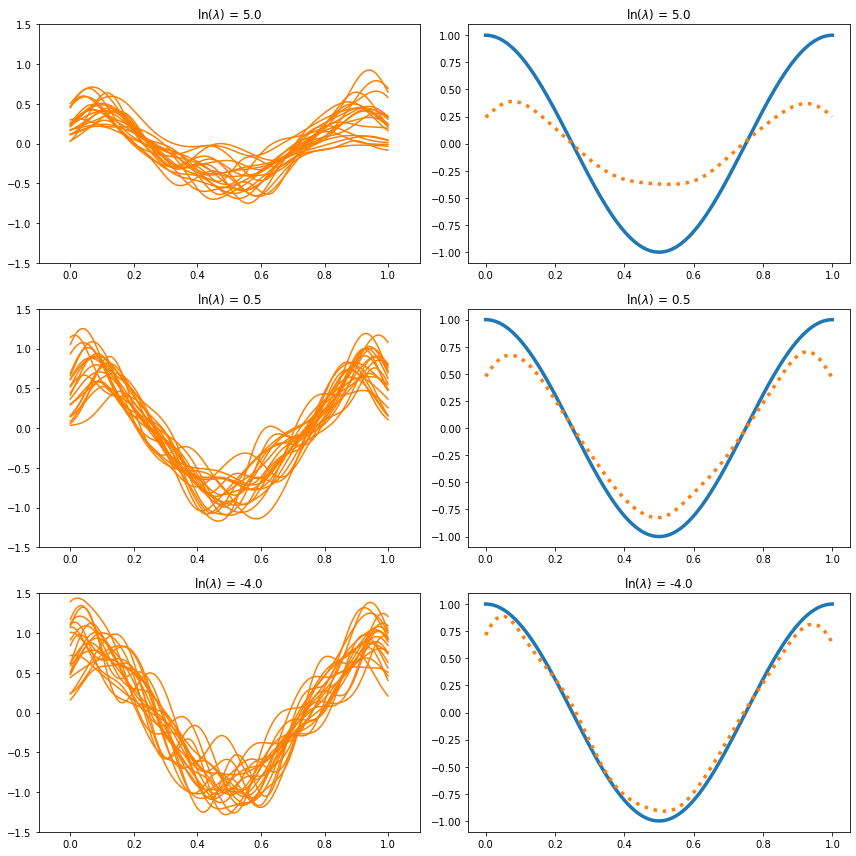

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import cholesky
from numpy import linalg


def gaussSample(mu, sigma, n):
    A = cholesky(sigma)
    Z = np.random.normal(loc=0, scale=1, size=(len(mu), n))
    return np.dot(A, Z).T + mu


def ridge(X, y, lam):
    """
    This function can be completed pinv as well
    """
    W = np.dot(linalg.pinv((np.dot(X.T, X) + np.sqrt(lam) * np.eye(X.shape[0]))), np.dot(X.T, y))
    return W


def basisExpansion(X, s=None, centers=[]):
    n = 25
    if not s:
        s = np.std(X) / np.sqrt(n)

    if not len(centers):
        centers = X[1:]

    Xbasis = np.ones((X.shape[0], n))
    for i in range(1, n):
        Xbasis[:, i] = np.ravel(np.exp((-1 / (2 * s**2)) * (X - centers[i - 1]) ** 2))
    return Xbasis, s, centers


def fun(X):
    """
    Cosine function
    """
    return np.cos(2 * np.pi * X)


def synthesizeData(n, d):
    sigma = np.array([[0.1]])
    mu = np.array([0])
    X = np.random.rand(n, d)
    y = fun(X) + gaussSample(mu, sigma, n)
    return X, y


n = 25
d = 1
lambdas = [np.exp(5), np.exp(0.5),np.exp(-4)]
ndataSets = 100
showNsets = 20
np.random.seed(42)

domain = np.arange(0, 1, 0.0005)
fs = 16

nr = 3
nc = 3

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for lam in range(len(lambdas)):
    yhat = np.zeros((len(domain), ndataSets))
    for j in range(ndataSets):
        X, y = synthesizeData(n, d)
        X, s, centers = basisExpansion(X)
        W = ridge(X, y, lambdas[lam])
        yhat[:, j] = np.ravel(np.dot(basisExpansion(domain, s, centers)[0], W))

    ax[lam, 0].plot(domain[..., np.newaxis].repeat(20, axis=1), yhat[:, :showNsets], color="#ff7f00")
    ax[lam, 0].set_xlim([-0.1, 1.1])
    ax[lam, 0].set_ylim([-1.5, 1.5])
    ax[lam, 0].set_title("ln($\lambda$) = {}".format(np.log(lambdas[lam])))

    ax[lam, 1].plot(domain, fun(domain), linewidth=3.5)
    ax[lam, 1].plot(domain, np.mean(yhat, axis=1), linestyle=":", linewidth=3.5)
    ax[lam, 1].set_title("ln($\lambda$) = {}".format(np.log(lambdas[lam])))
    fig.tight_layout()

plt.savefig("biasVarModelComplexityV3.png")